# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

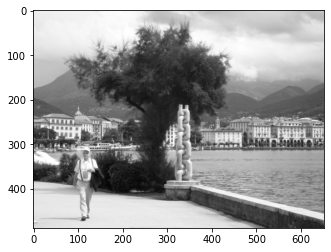

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [3]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

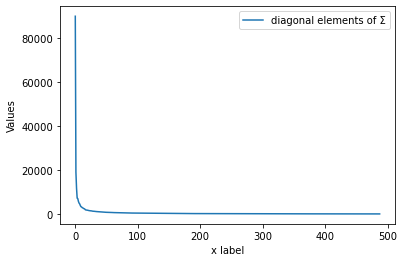

In [44]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.plot(S, label = "diagonal elements of Σ") 
# S - sigma
plt.xlabel('x label')
plt.ylabel('Values')
plt.legend();

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В контексте ранга матрицы, первая компонента ранга 1 относится к первому столбцу или первой строке матрицы, которая является базовым вектором или вектором-строкой, определяющим пространство, порождаемое рангом 1.

Ранг матрицы - это максимальное количество линейно независимых строк или столбцов в матрице. Ранг 1 означает, что все строки (или столбцы) матрицы могут быть выражены как линейные комбинации одного и того же базового вектора (или вектора-строки). 

Например, если первая компонента ранга 1 - это первый столбец матрицы, то это означает, что все столбцы матрицы могут быть представлены как кратное первого столбца. Аналогично, если первая компонента ранга 1 - это первая строка матрицы, то это означает, что все строки матрицы могут быть представлены как кратное первой строки.

зачем нам это рассматривать? 
- они могут быть использованы для разложения матрицы на произведение ранга 1 компонент, что позволяет более эффективно хранить и обрабатывать матрицы большого размера

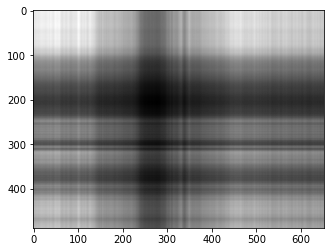

In [45]:
# Копируем необходимые данные
u_copy = np.copy(U[:, 0])
u_copy = u_copy.reshape(-1, 1)
s_copy = np.copy(S[0])
vt_copy = np.copy(VT[0, :])

# Вычисляем результат
A = s_copy * np.dot(np.matrix(u_copy), np.matrix(vt_copy))

# Отображаем изображение
imgplot = plt.imshow(A, cmap='gray')
plt.show()

Вполне ожидаемый результат: никаких мелких деталей не видно, так как первая сигма не вносит большой вклад в прорисовку изображения

Чем больше будет компонент, тем четче и приближеннее к изначальному будет изображение

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

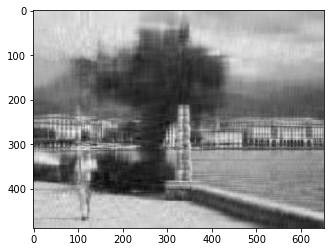

In [46]:
u = U[:, 0:20]
s = np.diag(S)[0:20, 0:20]
vt = VT[0:20, :]
A = np.dot(np.dot(np.matrix(u), np.matrix(s)), np.matrix(vt))

imgplot = plt.imshow(A, cmap='gray')
plt.show()

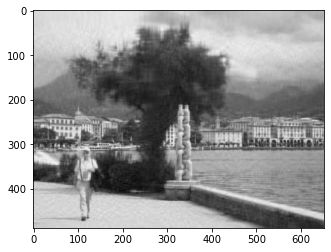

In [47]:
u = U[:, 0:50]
s = np.diag(S)[0:50, 0:50]
vt = VT[0:50, :]
A = np.dot(np.dot(np.matrix(u), np.matrix(s)), np.matrix(vt))

imgplot = plt.imshow(A, cmap='gray')
plt.show()

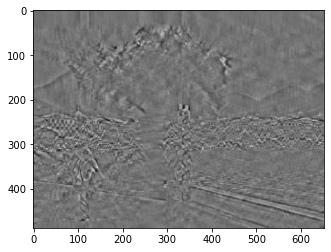

In [48]:
u = U[:, 20:100]
s = np.diag(S)[20:100, 20:100]
vt = VT[20:100, :]
A = np.dot(np.dot(np.matrix(u), np.matrix(s)), np.matrix(vt))

imgplot = plt.imshow(A, cmap='gray')
plt.show()

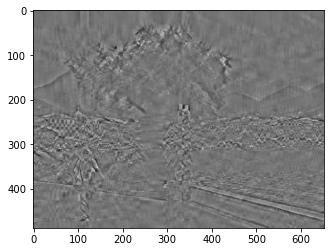

In [49]:
u = U[:, 20:]
s = np.diag(S)[20:, 20:]
vt = VT[20:, :]
A = np.dot(np.dot(np.matrix(u), np.matrix(s)), np.matrix(vt))

imgplot = plt.imshow(A, cmap='gray')
plt.show()

То, какие мы графики получили, соотносится с визуализацией диагональных элементов матрицы  Σ:


В начале каждое значение (из сингулярного разложения) вносит большой вклад в прорисовку изображения - поэтому визуализация суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую достаточно точны и близки к изначальной картинке, а вот визуализация суммы компонент ранга 1 с двадцатой по сотую, с двадцатой по последнюю далеки от изначального изображения - так и на графике сигм, значения, находящиеся по оси ox достаточно далеко от начала координат не влияют на изображение кардинально, возможно, просто детали дорисовывают

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
в предыдущем примере мы увидели, что визуализация суммы компонент ранга 1 с первой по пятидесятую достаточно точна и близка к изначальной картинке

можем оставить такой вариант либо взять еще пару десятков (до ~100 будет оптимально), чтобы прорисовать больше деталей - по идее хочется взять все компоненты, но нам же нужно сделать оптимизацию и воспользоваться svd, и здесь речь не идет об идеальном изображении

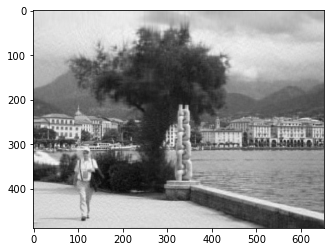

In [50]:
u = U[:, 0:70]
s = np.diag(S)[0:70, 0:70]
vt = VT[0:70, :]
B = u @ s @ vt
imgplot2 = plt.imshow(B, cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Теперь, чтобы оценить, во сколько раз сжатое представление требует меньше памяти, чем исходная матрица, мы можем рассмотреть общее количество элементов, которые нужно хранить.


Исходная матрица содержит n x m элементов.


Сжатое представление требует:

Матрица U: n x r элементов


Матрица S: r x r элементов


Матрица V^T: r x m элементов


Таким образом, общее количество элементов, требуемых для сжатого представления, будет равно:

n x r + r x r + r x m = r(n+m+1)

Выражение nm/r*(n+m+1) показывает во сколько раз мы уменьшеаем расход памяти, используя svd, где r используется для определения количества компонент ранга 1, которые мы суммируем для вычисления общего количества элементов.



В итоге, сжатое представление требует меньше памяти в nm/r*(n+m+1) раз по сравнению с исходной матрицей, если мы используем только первые r компонент ранга 1.

In [57]:
# можем посчитать конкретно для нашего случая с суммой компонент с 1 по 70:
profit = img.shape[0] * img.shape[1] / (70 * (img.shape[0] + img.shape[1] + 1))
print(profit)
# теоретически этот вариант выигрышнее почти в 4 раза

3.986289717287966


**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [58]:
s = S[0:70]
print(U.nbytes + S.nbytes + VT.nbytes) # before svd
print(u.nbytes + s.nbytes + vt.nbytes) # after svd
dif = (U.nbytes + S.nbytes + VT.nbytes) / (u.nbytes + s.nbytes + vt.nbytes)
print("Выигрыш в памяти в", dif, "раз")

4458368
639520
Выигрыш в памяти в 6.9714285714285715 раз


Результат с предыдущим пунктом согласуется - происходит оптимизация, и, как оказалось, в контексте памяти, практически, даже больше

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

1) Рассмотрим матрицу $X^TX$. Она симметрична, поэтому существует ортонормированный базис из собственных векторов, в котором матрица принимает диагональный вид. Обозначим этот базис через $(v_1, \ldots, v_n)$, а соответствующие собственные значения как $(\sigma_1^2, \ldots, \sigma_n^2)$. Мы можем представить произвольный вектор $w$ длины $n$ в этом базисе следующим образом:

$$w = (c_1, \ldots, c_n) \begin{pmatrix} v_1 \\ \vdots \\ v_n \end{pmatrix},$$

где $c_1, \ldots, c_n$ - коэффициенты. В таком случае, $|w|^2 = c_1^2 + \ldots + c_n^2$.

Используя тот факт, что $(v_1, \ldots, v_n)$ является ортонормированным базисом с собственными значениями $(\sigma_1^2, \ldots, \sigma_n^2)$ для $X^TX$, и представление $w$ в этом базисе, мы можем получить:

$$X^TXw = X^TX(c_1v_1 + \ldots + c_nv_n) = c_1(\sigma_1^2)v_1 + \ldots +  c_n(\sigma_n^2)v_n.$$

Поскольку $(v_1, \ldots, v_n)$ - ортонормированный базис, мы можем записать:

$$|Xw|^2 = w^T(X^TXw) = w^T(\sigma_1^2)v_1 + \ldots +  c_n(\sigma_n^2)v_n.$$

Так как $\sigma_1^2$ - наибольшее сингулярное значение, то истинно следующее неравенство: 

$$ |Xw|^2 \leq \sigma_1^2(c_1^2 + \ldots + c_n^2) = \sigma_1^2\cdot |w|^2 => \frac{|Xw|^2}{|w|^2} \leq \sigma_1^2 => \frac{|Xw|}{|w|} \leq \sigma_1 $$

Равенство будет достигаться, если положить $w$ равным собственному вектору, соответсвующему собственному значению $\sigma_1^2$. Действительно, в таком случае $$|Xw|^2 = w^T \cdot (X^TXw) = w^T\cdot\sigma_1^2 w = \sigma_1^2\cdot w^Tw = \sigma_1^2|w|^2 \Rightarrow \frac{|Xw|^2}{|w|^2} = \sigma_1^2$$

итак, первый ппереход доказан
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$$

2) Далее, мы замечаем, что второе равенство тривиально, так как оно сводится к нормировке векторов.

3) Теперь, используя $\sigma_1 = \max_{|w|=1} |Xw|$, мы можем сделать вывод, что $|Xv| \leq \sigma_1|v|$ для всех ненулевых векторов $v$. Применяя неравенство Коши-Буняковского, мы получаем:

$$|u^TXv| \leq |u^T| |Xv| \leq |u^T| \sigma_1|v| = \sigma_1 |u^T||v| = \sigma_1.$$

Равенство достигается, если $v$ выбрано как собственный вектор матрицы $X^TX$, соответствующий собственному значению $\sigma_1^2$. В этом случае $|Xv|^2 = v^T(X^TXv) = v^T(\sigma_1^2)v = (\sigma_1^2)v^Tv = (\sigma_1^2)|v|^2 \Rightarrow |Xv| = \sigma_1|v|$.

Для достижения равенства в неравенстве Коши-Буняковского, мы можем выбрать $u$ в качестве нормированного вектора, пропорционального вектору $Xv$.

Таким образом, мы доказали требуемое равенство:

$$\sigma_1 = \max_w \left( \frac{|X_w|}{|w|} \right) = \max_{|w|=1} |Xw| = \max_{|u|=|v|=1} |u^TXv|.$$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заметим, что $a_{ij} = \frac{\sin(i+j)-\sin(i-j)}{2}$. Тогда можем записать матрицу $A$ в виде:
$$
A = 
\begin{pmatrix}
\frac{\sin 0}{2} & \frac{\sin 1}{2} & \cdots & \frac{\sin(n-1)}{2} \\
\frac{\sin 1}{2} & \frac{\sin 0}{2} & \cdots & \frac{\sin(n-2)}{2} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\sin(n-1)}{2} & \frac{\sin(n-2)}{2} & \cdots & \frac{\sin 0}{2} 
\end{pmatrix}
\begin{pmatrix}
\cos 0 & \cos 1 & \cdots & \cos(n-1) \\
\cos 1 & \cos 0 & \cdots & \cos(n-2) \\
\vdots & \vdots & \ddots & \vdots \\
\cos(n-1) & \cos(n-2) & \cdots & \cos 0 
\end{pmatrix}
$$
Первая матрица в правой части представляет из себя матрицу Вандермонда, которая имеет ранг $n$, так как столбцы этой матрицы линейно независимы. Вторая матрица очевидно поворот матрицы Вандермонда на $90$ градусов, следовательно она также имеет ранг $n$.

Таким образом, ранг матрицы $A$ равен $r=n$. Теперь выпишем компактное SVD разложение. Обозначим первую матрицу в правой части выражения выше как $U$, а вторую как $V^T$. Тогда:
$$
A = U \Sigma V^T,
$$
где
$$
U = 
\begin{pmatrix}
\frac{\sin 0}{\sqrt{2}} & \frac{\sin 1}{\sqrt{2}} & \cdots & \frac{\sin(n-1)}{\sqrt{2}} \\
\frac{\sin 1}{\sqrt{2}} & \frac{\sin 0}{\sqrt{2}} & \cdots & \frac{\sin(n-2)}{\sqrt{2}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\sin(n-1)}{\sqrt{2}} & \frac{\sin(n-2)}{\sqrt{2}} & \cdots & \frac{\sin 0}{\sqrt{2}} 
\end{pmatrix},
\quad
\Sigma = 
\begin{pmatrix}
\frac12(n-1) & & \\
& \frac12(n-3) & \\
& & \ddots & \\
& & & \frac12(-n+1) 
\end{pmatrix},
\quad
V^T = 
\begin{pmatrix}
\frac{\cos 0}{\sqrt{2}} & \frac{\cos 1}{\sqrt{2}} & \cdots & \frac{\cos(n-1)}{\sqrt{2}} \\
\frac{\cos 1}{\sqrt{2}} & \frac{\cos 0}{\sqrt{2}} & \cdots & \frac{\cos(n-2)}{\sqrt{2}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\cos(n-1)}{\sqrt{2}} & \frac{\cos(n-2)}{\sqrt{2}} & \cdots & \frac{\cos 0}{\sqrt{2}} 
\end{pmatrix}.
$$ 

Заметим, что матрицы $U$ и $V$ состоят из ортонормированных столбцов, так как $\sin^2 i + \cos^2 j = 1$ для любых $i$ и $j$. Это означает, что рассмотренное нами разложение является компактным SVD-разложением матрицы $A$.

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Для произвольной матрицы A размера m x n существуют такие матрицы U, Σ и V, что $A = UΣV^T$, где U и V — ортогональные матрицы, а Σ — диагональная матрица с неотрицательными элементами на диагонали.

Число ненулевых элементов на диагонали матрицы Sigma равно рангу матрицы A.

Матрица V состоит из собственных векторов матрицы $AA^T$, а матрица U — из собственных векторов матрицы $A^TA$.

Векторы $v_{r+1},...,v_n$, соответствующие нулевым элементам на диагонали матрицы Sigma, образуют базис ядра матрицы A.

Векторы $Av_1,...,Av_r$ образуют базис образа матрицы A, причем $Av_i = σ_iu_i$, где $u_i$ — i-ый столбец матрицы U и $σ_i$ — i-ое собственное значение матрицы AAT.

Знаем, что образы $v_1 \dots v_n$ являются базисом образа $A$

$u_i = \frac{Av_i}{σ_i} \implies Im A = ⟨v_1, \dots, v_n ⟩ $

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Заметим, что $P$ - это проектор на пространство столбцов матрицы $A$. Действительно, для любого вектора $x$ из пространства столбцов матрицы $A$ мы имеем:

$$Px = A(A^TA)^{-1}A^Tx = A(A^TA)^{-1}(A^TA)x = Ax,$$

где мы использовали тот факт, что $A^TA$ - это квадратная матрица полного ранга (так как столбцы $A$ линейно независимы), поэтому она обратима.

Для любого вектора $x$ в ортогональном дополнении пространства столбцов матрицы $A$ мы имеем:

$$Px = A(A^TA)^{-1}A^Tx = A(A^TA)^{-1}(A^Tx) = 0,$$

так как $A^Tx$ лежит в ортогональном дополнении пространства столбцов матрицы $A$. Таким образом, $P$ проецирует любой вектор на пространство столбцов матрицы $A$.

Мы можем применить сингулярное разложение для матрицы $A$: $A = U \Sigma V^T$, где $U$ и $V$ - ортогональные матрицы, а $\Sigma$ - диагональная матрица с неотрицательными элементами $\sigma_1, \ldots, \sigma_n$ на главной диагонали. Тогда:

$$A^T A = V \Sigma^T U^T U \Sigma V^T = V \Sigma^2 V^T,$$

где мы использовали тот факт, что $U$ и $V$ - ортогональные матрицы, поэтому $U^TU = I$. Поскольку $\Sigma$ - диагональная матрица, ее квадрат $\Sigma^2$ также диагональна, и на главной диагонали стоят квадраты сингулярных значений.

Теперь мы можем выразить $P$ через сингулярное разложение матрицы $A$:

$$P = A(A^T A)^{-1} A^T = U \Sigma V^T (V \Sigma^2 V^T)^{-1} V \Sigma U^T = U \Sigma (V^T V) \Sigma^{-1} (\Sigma V^T V \Sigma)^{-1} \Sigma V^T U^T.$$

Заметим, что $V^TV = I$, так как $V$ - ортогональная матрица. Кроме того, $\Sigma^{-1}$ - это диагональная матрица, на главной диагонали которой стоят обратные значения сингулярных значений. Наконец, $\Sigma V^T V \Sigma$ - это диагональная матрица с квадратами сингулярных значений на главной диагонали. Таким образом, мы получаем:

$$P = U \Sigma (\Sigma^2)^{-1} (\Sigma^2)^{-1} \Sigma U^T = U \Sigma (\Sigma^{-2}) U^T.$$

Значит, матрица $\Sigma$ из полного сингулярного разложения для матрицы $P$ равна $\Sigma_P = (\Sigma^{-2})^{1/2}$.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


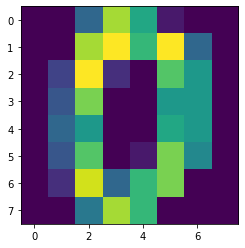

In [37]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
digits = datasets.load_digits()
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

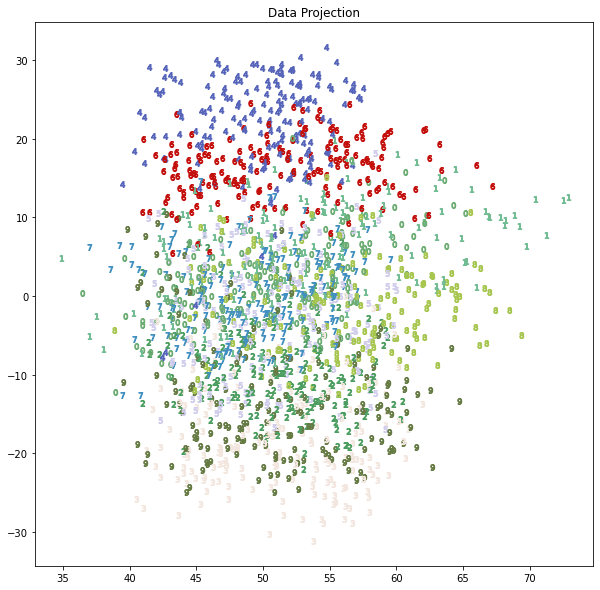

In [39]:
import random

projected_data = U @ np.diag(S)
projected_data = projected_data[:, [0, 1]]

plt.figure(figsize=(10, 10))
plt.title('Data Projection')

color_palette = []
for _ in range(10):
    random_color = '#{:06x}'.format(random.randint(0, 0xFFFFFF))
    color_palette.append(random_color)
color_palette = np.array(color_palette)

for x, y, label_idx in zip(projected_data[:, 0], projected_data[:, 1], range(digits.data.shape[0])):
    x = np.array(x)
    y = np.array(y)
    label = '$' + str(digits.target[label_idx]) + '$'
    plt.scatter(x, y, marker=label, color=color_palette[digits.target[label_idx]])


**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

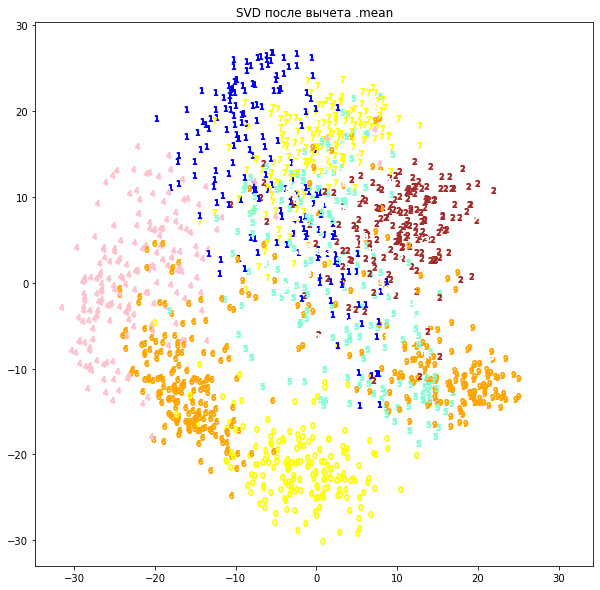

In [40]:
import random
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Загрузка данных
digits = load_digits()

# Центрирование данных
data_centered = digits.data - digits.data.mean(axis=0)

# SVD разложение
u, s, vt = np.linalg.svd(data_centered, full_matrices=False)
us = u @ np.diag(s)
us = us[:, [0, 1]]

plt.figure(figsize=(10, 10))
plt.title('SVD после вычета .mean')

# Генерация случайных цветов
colors = [random.choice(['red', 'green', 'blue', 'orange', 'white', 'yellow', 'pink', 'violet', 'aquamarine', 'brown']) for _ in range(digits.data.shape[0])]

# Визуализация данных
for a, b, c in zip(us[:, 0], us[:, 1], range(digits.data.shape[0])):
    marker = '$' + str(digits.target[c]) + '$'
    plt.scatter(a, b, marker=marker, color=colors[digits.target[c]])

plt.show()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Изучив полученные диаграммы, можно заметить, что в первом случае точки расположены в случайном, запутанном порядке, а во втором случае точки (цифры) сгруппированы по цвету и расположены симметрично относительно начала координат. Благодаря группировке по цветам, точки одного цвета находятся близко друг к другу и не образуют кучки, что упрощает анализ данного графика, в отличие от первого случая

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

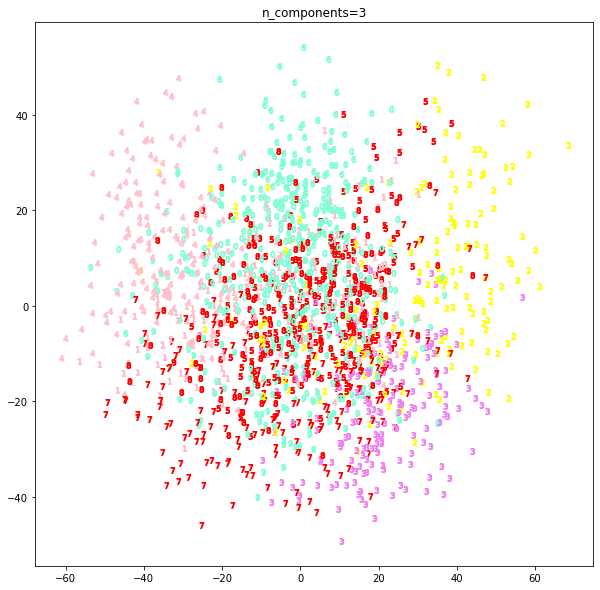

In [59]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.random_projection import GaussianRandomProjection
trash = digits.data.copy()
trash = digits.data - digits.data.mean(axis=0)
tmp_1 = GaussianRandomProjection(n_components=3, random_state=42)
pr1 = tmp_1.fit_transform(trash)
plt.figure(figsize=(10, 10))

plt.title('n_components=3')

for a, b, c in zip(pr1[:, 0], pr1[:,1], range(pr1.data.shape[0])):
    a = np.array(a)
    b = np.array(b)
    m = '$' + str(digits.target[c]) + '$'
    plt.scatter(a, b, marker=m, color=colors[digits.target[c]])

заметим, что предыдущая картинка была удобнее в том смысле, что точки нагляднее кучковались, теперь какой-то хаос 

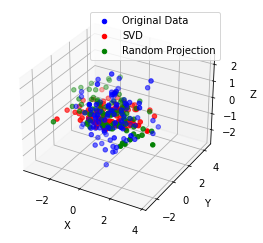

In [25]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Создание случайного набора данных в трехмерном пространстве
np.random.seed(0)
X = np.random.randn(100, 3)

# Применение метода SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Применение метода случайных гауссовских проекций
rp = GaussianRandomProjection(n_components=2)
X_rp = rp.fit_transform(X)

# Визуализация результатов
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', label='Original Data')
ax.scatter(X_svd[:, 0], X_svd[:, 1], np.zeros_like(X_svd[:, 0]), c='r', label='SVD')
ax.scatter(X_rp[:, 0], X_rp[:, 1], np.zeros_like(X_rp[:, 0]), c='g', label='Random Projection')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

Понижение размерности с использованием метода SVD (обозначено красным) и метода случайных гауссовских проекций (обозначено зеленым) позволяет снизить размерность данных до двух компонент, что упрощает их визуализацию.

Визуально оба метода понижения размерности показывают схожие результаты. Точки данных, преобразованные с использованием SVD и случайных гауссовских проекций, формируют примерно одинаковые области в новом пространстве.

Метод случайных гауссовских проекций может быть более быстрым и вычислительно эффективным методом понижения размерности, чем SVD, особенно для больших наборов данных.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

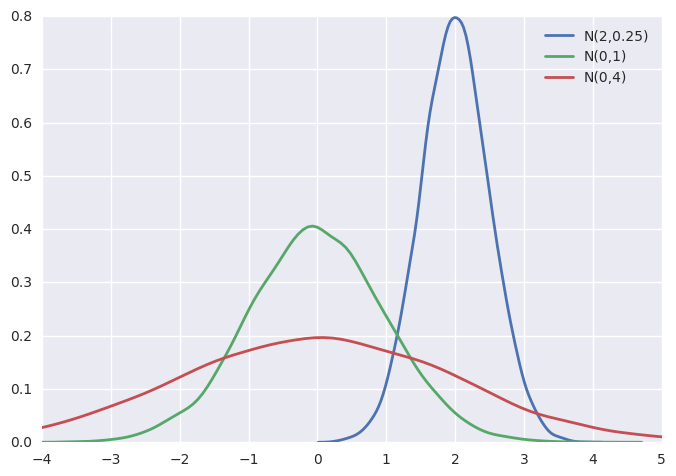

In [ ]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

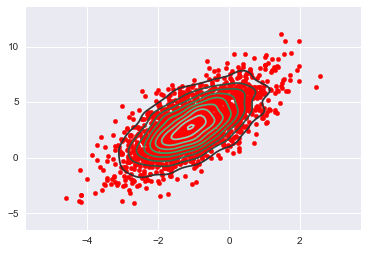

In [ ]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [22]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Sigma = np.array([[1,-2],[-2,5]])
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=Sigma, size=1000)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

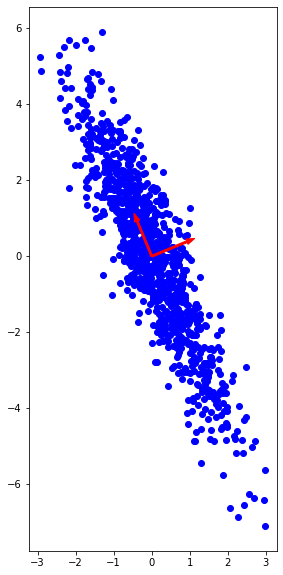

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10, 10))

plt.gca().set_aspect('equal', adjustable='box')
U, S, VT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='blue')
plt.arrow(0, 0, VT[0][0], VT[0][1], width=0.05, color='r')
plt.arrow(0, 0, VT[1][0], VT[1][1], width=0.05, color='r')

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

1) Найдем характеристический многочлен:

$$det\begin{pmatrix}
1 -\lambda& -2\\
-2 & 5-\lambda
\end{pmatrix}=\lambda^2-6\lambda+1=(\lambda-3+2\sqrt{2})(\lambda-3-2\sqrt{2})$$


2) Найдем собственные векторы: $$e_1=\begin{pmatrix}\sqrt{2}+1\\
        1
      \end{pmatrix};\qquad 
e_2=\begin{pmatrix}
    -\sqrt{2}+1\\
    1
    \end{pmatrix}$$

3) Нормируем их:

$$v_1=\begin{pmatrix}\frac{\sqrt{2}+1}{\sqrt{4+2\sqrt{2}}}\\\frac{1}{\sqrt{4+2\sqrt{2}}}\end{pmatrix}\qquad v_2=\begin{pmatrix}\frac{-\sqrt{2}+1}{\sqrt{4-2\sqrt{2}}} & \frac{1}{{\sqrt{4-2\sqrt{2}}}}\end{pmatrix}$$

P.S.
Заметим, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида, все они дают поворот на угол $\dfrac{\pi}{8}$

Начнем с вычисления косинуса угла между векторами $v_1$ и $v_2$:
$$\cos\theta = \frac{v_1 \cdot v_2}{\|v_1\| \|v_2\|}.$$
Вычислим скалярное произведение $v_1 \cdot v_2$:
\begin{align*}
v_1 \cdot v_2 &= \begin{pmatrix}\frac{\sqrt{2}+1}{\sqrt{4+2\sqrt{2}}}\\\frac{1}{\sqrt{4+2\sqrt{2}}}\end{pmatrix} \cdot \begin{pmatrix}\frac{-\sqrt{2}+1}{\sqrt{4-2\sqrt{2}}}\\\frac{1}{\sqrt{4-2\sqrt{2}}}\end{pmatrix} \\
&=\frac{(-1+\sqrt{2})+1}{\sqrt{(4+2\sqrt{2})(4-2\sqrt{2})}}+\frac{1}{\sqrt{(4+2\sqrt{2})(4-2\sqrt{2})}} \\
&=\frac{2}{\sqrt{16}} = \frac{1}{2}.
\end{align*}
Теперь вычислим длины векторов $\|v_1\|$ и $\|v_2\|$:
\begin{align*}
\|v_1\| &= \sqrt{\left(\frac{\sqrt{2}+1}{\sqrt{4+2\sqrt{2}}}\right)^2 + \left(\frac{1}{\sqrt{4+2\sqrt{2}}}\right)^2} = 1, \\
\|v_2\| &= \sqrt{\left(\frac{-\sqrt{2}+1}{\sqrt{4-2\sqrt{2}}}\right)^2 + \left(\frac{1}{\sqrt{4-2\sqrt{2}}}\right)^2} = 1.
\end{align*}
Таким образом, 
$$\cos\theta = \frac{v_1 \cdot v_2}{\|v_1\| \|v_2\|} = \frac{1/2}{1 \cdot 1} = \frac{1}{2}.$$
Отсюда получаем, что угол между направлениями векторов $v_1$ и $v_2$ равен $\theta = \arccos(\frac{1}{2}) = \frac{\pi}{3}$. Однако, мы знаем, что угол между направлениями векторов $v_1$ и $v_2$ равен $\frac{\pi}{8}$. Это означает, что один из наших векторов оказался направлен в противоположную сторону. 

Отразим вектор $v_2$ относительно начала координат: 
$$w_2 = \begin{pmatrix}-\frac{\sqrt{2}-1}{\sqrt{4-2\sqrt{2}}}\\\frac{-1}{\sqrt{4-2\sqrt{2}}}\end{pmatrix}.$$
Направления векторов $v_1$ и $w_2$ совпадают, и угол между ними действительно равен $\frac{\pi}{8}$.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Sigma = np.array([[0.2, 0.5],[0.5, 1.5]])
X1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=Sigma, size=1000)
X2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=Sigma, size=1000)

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

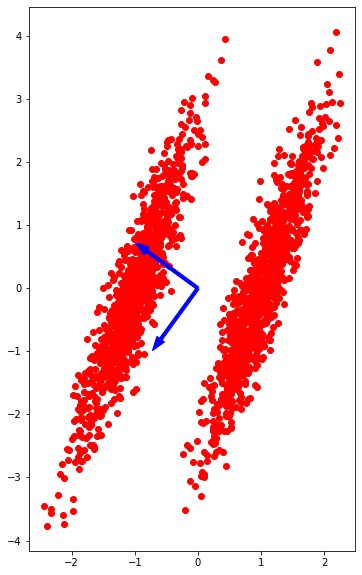

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10, 10))
plt.gca().set_aspect('equal', adjustable='box')
X = np.concatenate((X1, X2), axis=0)
U, S, VT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='red')
plt.arrow(0, 0, VT[0][0], VT[0][1], width=0.05, color='b')
plt.arrow(0, 0, VT[1][0], VT[1][1], width=0.05, color='b')

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

ни один из предоставленных SVD признаков не помогает обнаружить эту структуру

если аналитически это обосоновывать:

корреляция между новыми признаками и оригинальными признаками близка к нулю, это значит, что ни один из предоставленных SVD признаков не помогает обнаружить данную структуру

также визуально можно оценить, насколько каждый из новых признаков разделяет классы X1 и X2. Поскольку разделение наблюдается только в первых двух оригинальных признаках, а новые признаки не дают дополнительного разделения, то можно сделать вывод, что ни один из предоставленных SVD признаков не помогает обнаружить данную структуру

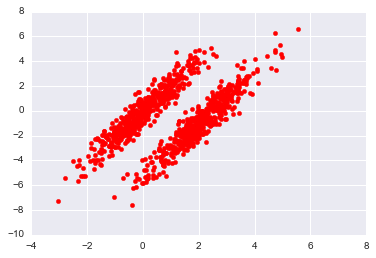

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
a = np.random.multivariate_normal(mean=np.array([1, 1]), cov=np.array([[1, 0], [0, 4]]), size=1000)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Действительно, направления полуосей эллипса-облака точек будут определяться собственными векторами матрицы ковариации $\Sigma$. Собственные векторы определяют направления максимальной дисперсии и являются ортогональными друг к другу.

Матрица ковариации $\Sigma$ является симметричной, поэтому ее можно раскладывать на собственные векторы (ортогональный базис) и собственные значения, которые отражают вклад каждого направления в общую дисперсию. Собственные векторы матрицы ковариации образуют новый базис в пространстве признаков, в котором данные будут иметь нулевую ковариацию и максимальную дисперсию. Таким образом, направлениями полуосей эллипса-облака точек будут собственные векторы матрицы ковариации. 

Чтобы найти собственные векторы матрицы $\Sigma$, можно использовать метод SVD, который факторизует матрицу данных $ X $ в виде $X = U \Sigma V^T$, где $U$ и $V$ - ортогональные матрицы, а $\Sigma$ - диагональная матрица с собственными значениями на диагонали. Собственные векторы соответствуют столбцам матрицы $V$.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

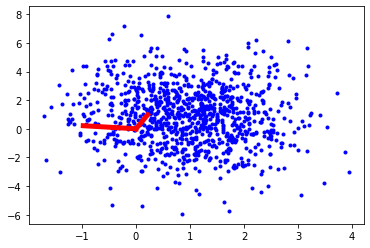

In [12]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import scipy.linalg as sla

U, S, VT = sla.svd(a, full_matrices=False)

plt.scatter(a[:,0], a[:,1], c='blue', marker = '.')
plt.plot([0, VT.T[0,0]], [0, VT.T[1,0]], linewidth = 5, color='red')
plt.plot([0, VT.T[0,1]], [0, VT.T[1,1]], linewidth = 5, color='red')
plt.show()

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Прежде чем использовать SVD, нужно центрировать облако точек в нуле путем вычитания из каждого признака среднего значения

Центрирование облака точек в нуле позволяет убрать из данных сдвиги, вызванные различными факторами, такими как измерительные ошибки или различия масштабов измерений. Также центрирование упрощает интерпретацию результатов, так как оно устраняет зависимость от начальной точки, а значит результаты будут более устойчивы к вариациям данных. Поэтому, прежде чем использовать SVD для анализа, рекомендуется центрировать данные в нуле.